In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/Fake-News/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


In [6]:
x = df.drop("label",axis=1)

In [7]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...


In [8]:
y = df['label']

In [9]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [10]:
df.shape

(20800, 5)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [12]:
df = df.dropna()

In [14]:
df.shape

(18285, 5)

In [15]:
messages = df.copy()

In [16]:
messages.reset_index(inplace=True)

In [17]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [19]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import regex as re
import nltk
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
  review = re.sub("[^a-z-A-Z]", " ", messages["title"][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
  review = " ".join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu - breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video - breitbart',
 'beno hamon win french socialist parti presidenti nomin - new york time',
 'back-channel plan ukrain russia courtesi trump associ - new york time',
 'obama organ action partner soros-link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success - new york time',
 'well fargo chief abruptli step - new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fb

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [31]:
x.shape

(18285, 5000)

In [33]:
y = messages['label']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state=0)

In [35]:
cv.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid']

In [36]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [38]:
count_df = pd.DataFrame(X_train, columns= cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
count_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import matplotlib.pyplot as plt


In [62]:
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize = False, title = "Confusion Matrix", cmap = plt.cm.Blues):
  plt.imshow(cm,interpolation = "nearest", cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks,classes)
  if normalize:
    cm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j], color = "white" if cm [i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

In [63]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [64]:
from sklearn import metrics
import itertools

accuracy:   0.90
Confusion Matrix without Normalization


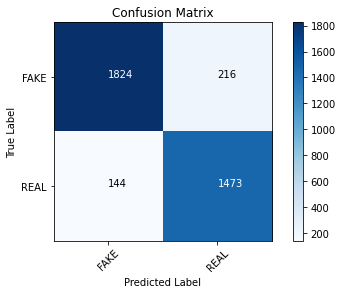

In [65]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm,["FAKE", "REAL"])

In [67]:
from sklearn.linear_model import PassiveAggressiveClassifier
liner_clf = PassiveAggressiveClassifier()


Accuracy:  0.92
Confusion Matrix without Normalization


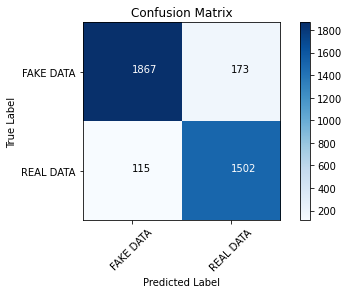

In [69]:
liner_clf.fit(X_train,y_train)
pred = liner_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy:  %0.2f" %score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm,["FAKE DATA", "REAL DATA"])

In [70]:
classifier = MultinomialNB(alpha=0.1)

In [75]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train,y_train)
  y_pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test, y_pred)
  if score > previous_score:
    classifier = sub_classifier
  print("Alpha: {}, Score: {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0, Score: 0.8925348646431501
Alpha: 0.1, Score: 0.9031993437243643
Alpha: 0.2, Score: 0.9045665846322122
Alpha: 0.30000000000000004, Score: 0.904019688269073
Alpha: 0.4, Score: 0.904019688269073
Alpha: 0.5, Score: 0.9023789991796555
Alpha: 0.6000000000000001, Score: 0.9021055509980859
Alpha: 0.7000000000000001, Score: 0.9010117582718075
Alpha: 0.8, Score: 0.9010117582718075
Alpha: 0.9, Score: 0.9018321028165163


In [77]:
features_names = cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [78]:
classifier.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -9.2543182 ,  -8.65750213,  -9.2543182 , ..., -10.94891392,
        -8.77669064,  -9.48257685])

In [83]:
sorted(zip(classifier.coef_[0],features_names), reverse = True)[:20] #Most True Values

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-3.957123910793668, 'trump'),
 (-4.272810506552638, 'hillari'),
 (-4.354500458969101, 'clinton'),
 (-4.880231161899351, 'elect'),
 (-5.14010431730609, 'new'),
 (-5.256679346650575, 'video'),
 (-5.260433104812079, 'comment'),
 (-5.359171493440227, 'us'),
 (-5.371702985752141, 'war'),
 (-5.380145416647424, 'hillari clinton'),
 (-5.410268176102532, 'fbi'),
 (-5.459517161110479, 'vote'),
 (-5.473380599412589, 'email'),
 (-5.550751217201126, 'world'),
 (-5.58138148314937, 'obama'),
 (-5.685072981700816, 'donald'),
 (-5.720184838977557, 'donald trump'),
 (-5.7382141734955, 'russia'),
 (-5.820330993459326, 'america'),
 (-5.860631947532313, 'day')]

In [84]:
sorted(zip(classifier.coef_[0],features_names), reverse = False)[:20] #Most fake values

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-10.94891391871888, 'abroad'),
 (-10.94891391871888, 'abus new'),
 (-10.94891391871888, 'abus new york'),
 (-10.94891391871888, 'act new'),
 (-10.94891391871888, 'act new york'),
 (-10.94891391871888, 'advic'),
 (-10.94891391871888, 'advis new'),
 (-10.94891391871888, 'advis new york'),
 (-10.94891391871888, 'afford care'),
 (-10.94891391871888, 'afford care act'),
 (-10.94891391871888, 'age new'),
 (-10.94891391871888, 'age new york'),
 (-10.94891391871888, 'agenda breitbart'),
 (-10.94891391871888, 'aleppo new'),
 (-10.94891391871888, 'aleppo new york'),
 (-10.94891391871888, 'ali'),
 (-10.94891391871888, 'america breitbart'),
 (-10.94891391871888, 'america new york'),
 (-10.94891391871888, 'ami'),
 (-10.94891391871888, 'ami schumer')]